In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_dir="/proj/prismgt-PG0/rbachkaniwala3/code/low_level_func/logs"
program_file_dir="/proj/prismgt-PG0/rbachkaniwala3/code/low_level_func"

In [3]:
# get all program files that end with .py
program_files = [f for f in os.listdir(program_file_dir) if f.endswith(".py")]

In [4]:
program = program_files[0].split(".")[0]
same_program_csv_dir=os.path.join(csv_dir,program)
# samples = total number of runs for each program
samples = len(os.listdir(same_program_csv_dir))

In [5]:
op_to_func = {}

# loop through csv files in csv_dir
for program_ in program_files:
    program = program_.split(".")[0]
    same_program_csv_dir=os.path.join(csv_dir,program)
    common_funcs_per_op = set()
    for csv_file in os.listdir(same_program_csv_dir):
        df = pd.read_csv(os.path.join(same_program_csv_dir,csv_file))
        # merge two columns with "|" as separator
        df["full_func"] = df['Function'].astype(str) + "|" + df['Module'].astype(str)
        column_values = set(df["full_func"].values)        
        # Update the set of common values
        if len(common_funcs_per_op) == 0:
            common_funcs_per_op = column_values
        else:
            common_funcs_per_op = common_funcs_per_op.intersection(column_values)
    op_to_func[program] = list(common_funcs_per_op)
    print(f"Common functions for {program} are {common_funcs_per_op}")

Common functions for ToTensor are {'_int_free|libc.so.6', 'ImagingPackRGB|_imaging.cpython-310-x86_64-linux-gnu.so', 'c10::function_ref<void (char**, long const*, long, long)>::callback_fn<at::TensorIteratorBase::loop_2d_from_1d<at::native::AVX2::copy_kernel(at::TensorIterator&, bool)::{lambda()#1}::operator()(void) const::{lambda()#7}::operator()(void) const::{lambda()#1}::operator()(void) const::{lambda()#1}::operator()(void) const::{lambda(char**long const*, long)#1}>(, signed char, at::native::AVX2::copy_kernel(at::TensorIterator&, bool)::{lambda()#1}::operator()(void) const::{lambda()#7}::operator()(void) const::{lambda()#1}::operator()(void) const::{lambda()#1}::operator()(void) const::{lambda(char**long const*, long)#1} const&)::{lambda(char**long const*, long, long)#1}>|libtorch_cpu.so', 'gomp_team_barrier_wait_end|libgomp.so.1', 'at::native::AVX2::vectorized_loop<at::native::(anonymous namespace)::div_true_kernel(at::TensorIteratorBase&)::{lambda()#1}::operator()(void) const::

In [6]:
op_to_func

{'ToTensor': ['_int_free|libc.so.6',
  'ImagingPackRGB|_imaging.cpython-310-x86_64-linux-gnu.so',
  'c10::function_ref<void (char**, long const*, long, long)>::callback_fn<at::TensorIteratorBase::loop_2d_from_1d<at::native::AVX2::copy_kernel(at::TensorIterator&, bool)::{lambda()#1}::operator()(void) const::{lambda()#7}::operator()(void) const::{lambda()#1}::operator()(void) const::{lambda()#1}::operator()(void) const::{lambda(char**long const*, long)#1}>(, signed char, at::native::AVX2::copy_kernel(at::TensorIterator&, bool)::{lambda()#1}::operator()(void) const::{lambda()#7}::operator()(void) const::{lambda()#1}::operator()(void) const::{lambda()#1}::operator()(void) const::{lambda(char**long const*, long)#1} const&)::{lambda(char**long const*, long, long)#1}>|libtorch_cpu.so',
  'gomp_team_barrier_wait_end|libgomp.so.1',
  'at::native::AVX2::vectorized_loop<at::native::(anonymous namespace)::div_true_kernel(at::TensorIteratorBase&)::{lambda()#1}::operator()(void) const::{lambda()#2}:

In [7]:
op_func_cpu_time = {}
for op,funcs in op_to_func.items():
    for func in funcs:
        op_func_cpu_time[f"{op}|{func}"] = []
# loop through csv files in csv_dir
for program_ in program_files:
    program = program_.split(".")[0]
    same_program_csv_dir=os.path.join(csv_dir,program)
    for csv_file in os.listdir(same_program_csv_dir):
        df = pd.read_csv(os.path.join(same_program_csv_dir,csv_file))
        # merge two columns with "|" as separator
        df["full_func"] = df['Function'].astype(str) + "|" + df['Module'].astype(str)
        # multiply by 1000 to convert to ms
        df["CPU Time"] = df["CPU Time"] * 1000
        for func in op_to_func[program]:
            op_func_cpu_time[f"{program}|{func}"].append(df[df["full_func"] == func]["CPU Time"].astype(float).sum())
           

In [8]:
op_func_cpu_time

{'ToTensor|_int_free|libc.so.6': [20.0,
  20.0,
  20.0,
  20.0,
  27.716,
  20.0,
  20.0,
  20.0,
  20.0,
  20.0,
  20.0,
  31.995,
  20.0,
  20.0,
  20.0,
  20.0,
  20.0,
  20.0,
  20.0,
  20.0],
 'ToTensor|ImagingPackRGB|_imaging.cpython-310-x86_64-linux-gnu.so': [857.459,
  651.986,
  628.385,
  1177.179,
  677.578,
  664.708,
  805.496,
  748.606,
  657.053,
  709.477,
  793.089,
  673.207,
  700.799,
  692.682,
  1140.004,
  681.5550000000001,
  749.8580000000001,
  704.468,
  1191.773,
  1154.4540000000002],
 'ToTensor|c10::function_ref<void (char**, long const*, long, long)>::callback_fn<at::TensorIteratorBase::loop_2d_from_1d<at::native::AVX2::copy_kernel(at::TensorIterator&, bool)::{lambda()#1}::operator()(void) const::{lambda()#7}::operator()(void) const::{lambda()#1}::operator()(void) const::{lambda()#1}::operator()(void) const::{lambda(char**long const*, long)#1}>(, signed char, at::native::AVX2::copy_kernel(at::TensorIterator&, bool)::{lambda()#1}::operator()(void) const::

In [9]:
op_func_cpu_time_std_dev = {}
for op_func in op_func_cpu_time:
    # get std dev
    op_func_cpu_time_std_dev[op_func] = pd.Series(op_func_cpu_time[op_func]).std()
    print(f"Std dev for {op_func} is {op_func_cpu_time_std_dev[op_func]}")
    # print(f"CPU time for {op_func} is {sum(op_func_cpu_time[op_func])}")

Std dev for ToTensor|_int_free|libc.so.6 is 3.1118661261118072
Std dev for ToTensor|ImagingPackRGB|_imaging.cpython-310-x86_64-linux-gnu.so is 194.5596687742268
Std dev for ToTensor|c10::function_ref<void (char**, long const*, long, long)>::callback_fn<at::TensorIteratorBase::loop_2d_from_1d<at::native::AVX2::copy_kernel(at::TensorIterator&, bool)::{lambda()#1}::operator()(void) const::{lambda()#7}::operator()(void) const::{lambda()#1}::operator()(void) const::{lambda()#1}::operator()(void) const::{lambda(char**long const*, long)#1}>(, signed char, at::native::AVX2::copy_kernel(at::TensorIterator&, bool)::{lambda()#1}::operator()(void) const::{lambda()#7}::operator()(void) const::{lambda()#1}::operator()(void) const::{lambda()#1}::operator()(void) const::{lambda(char**long const*, long)#1} const&)::{lambda(char**long const*, long, long)#1}>|libtorch_cpu.so is 1106.7894248293644
Std dev for ToTensor|gomp_team_barrier_wait_end|libgomp.so.1 is 29.762873085705113
Std dev for ToTensor|at::n

In [10]:
# append to dataframe with columns as op, func and rows as std dev

def map_func(op_func):
    op,func,module = op_func.split("|")
    if "div_true_kernel" in func:
        func = "div_true_kernel"
    elif "direct_copy_kernel" in func:
        func = "direct_copy_kernel"
    elif "copy_kernel" in func:
        func = "copy_kernel"
    elif "add_kernel" in func:
        func = "add_kernel"

    std_dev = op_func_cpu_time_std_dev[op_func]
    avg = sum(op_func_cpu_time[op_func])/len(op_func_cpu_time[op_func])
    coefficent_of_variation = op_func_cpu_time_std_dev[op_func]/avg
    full_func = func + "|" + module
    return (op,func,coefficent_of_variation,module,std_dev,avg,full_func)

df = pd.DataFrame(list(map(map_func,op_func_cpu_time)),columns=["op","func","coefficient of variation","module","std_dev","avg","full_func"])


In [11]:
df

,op,func,coefficient of variation,module,std_dev,avg,full_func
0,ToTensor,_int_free,0.148286,libc.so.6,3.111866,20.98555,_int_free|libc.so.6
1,ToTensor,ImagingPackRGB,0.242294,_imaging.cpython-310-x86_64-linux-gnu.so,194.559669,802.99080,ImagingPackRGB|_imaging.cpython-310-x86_64-lin...
2,ToTensor,copy_kernel,0.135419,libtorch_cpu.so,1106.789425,8173.05870,copy_kernel|libtorch_cpu.so
3,ToTensor,gomp_team_barrier_wait_end,0.533461,libgomp.so.1,29.762873,55.79200,gomp_team_barrier_wait_end|libgomp.so.1
4,ToTensor,div_true_kernel,0.094818,libtorch_cpu.so,964.325714,10170.27975,div_true_kernel|libtorch_cpu.so
5,ToTensor,munmap,0.071214,libc.so.6,2.424803,34.04930,munmap|libc.so.6
6,ToTensor,__memmove_avx_unaligned_erms,0.058663,libc.so.6,82.849058,1412.29785,__memmove_avx_unaligned_erms|libc.so.6
7,ToTensor,direct_copy_kernel,0.030672,libtorch_cpu.so,102.990936,3357.80495,direct_copy_kernel|libtorch_cpu.so
8,Normalize,direct_copy_kernel,0.182136,libtorch_cpu.so,2155.123099,11832.46705,direct_copy_kernel|libtorch_cpu.so
9,Normalize,add_kernel,0.087998,libtorch_cpu.so,215.396802,2447.75600,add_kernel|libtorch_cpu.so


In [12]:
# get all columns in full_func and create a row for each op that does not have that column with full_func, but zero as the value in coefficient of variation, std_dev and avg and avg

all_full_funcs = set(df["full_func"].values)
all_ops = set(df["op"].values)

for op in all_ops:
    for full_func in all_full_funcs:
        if full_func not in set(df[df["op"] == op]["full_func"].values):
            func,module = full_func.split('|')
            df_ = pd.DataFrame([[op,func,0,module,0,0,full_func]],columns=["op","func","coefficient of variation","module","std_dev","avg","full_func"])
            df = pd.concat([df,df_],ignore_index=True)

In [13]:
# sort by op and then by full_func
df = df.sort_values(by=["op","full_func"])

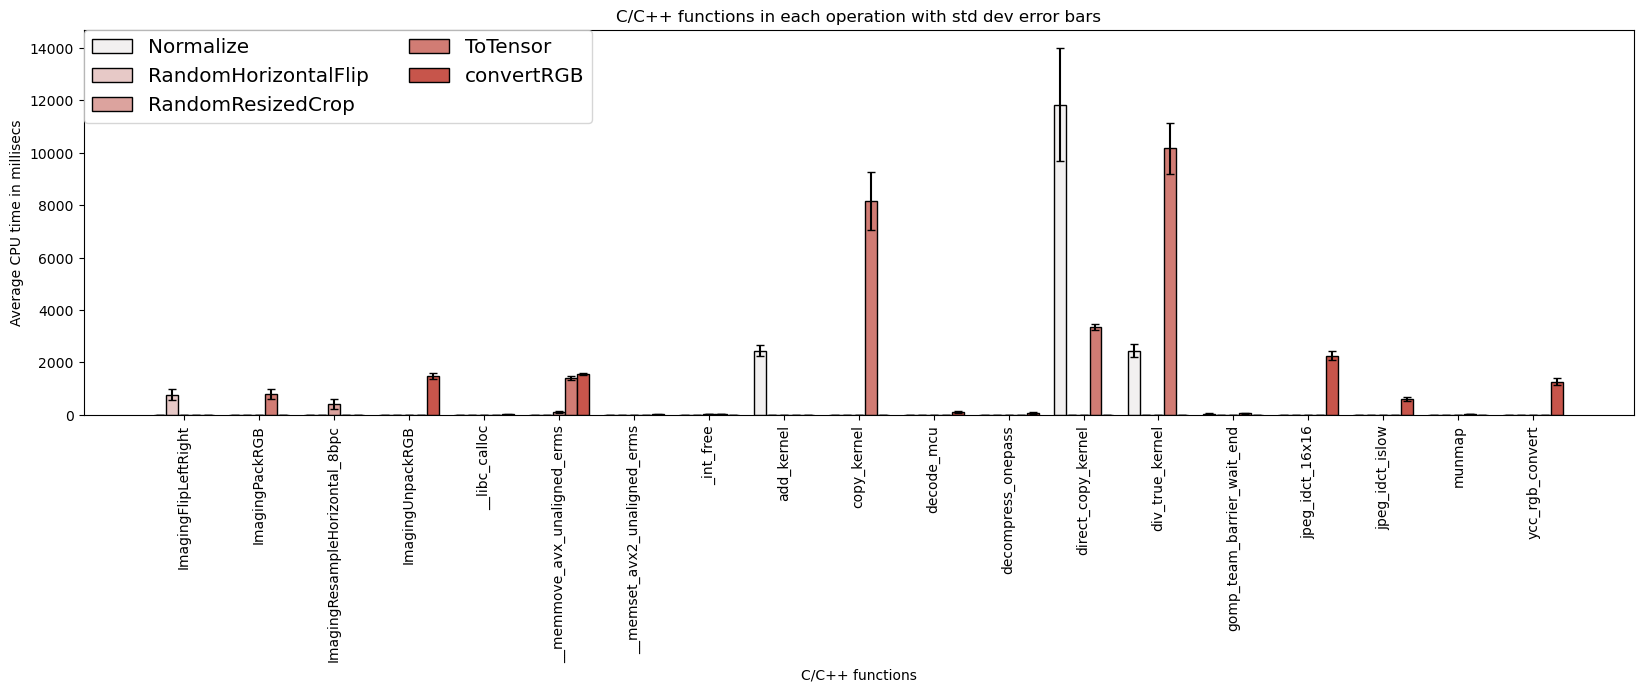

In [14]:

plt.figure(figsize=(20,5))
bar = sns.barplot(x="func",y="avg", hue="op", data=df, ci=None,color="#DB4437", edgecolor="black")
# plt.errorbar(x="func", y=df["avg"], yerr=df["std_dev"], fmt='none', color='black', capsize=4)

plt.xlabel("C/C++ functions")
plt.ylabel("Average CPU time in millisecs")
plt.title("C/C++ functions in each operation with std dev error bars")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)

# Define some hatches
# hatches = ['O','-', 'x', '\\', '//',]
hatches = ['//', '\\\\', '--', 'xx', 'oo', 'OO', '..', '**']
# Assign hatches to each hue category
# for i, patch in enumerate(bar.containers):
#     for bar in patch:
#         bar = bar.set_hatch(hatches[i % len(hatches)])
# get axes subplot object from plt
# bar = plt.gca()
for p in bar.patches:
    width = p.get_width() 
    break
x_coords = [p.get_x() + 0.5 * p.get_width() for p in bar.patches]
y_coords = [p.get_height() for p in bar.patches]
plt.errorbar(x=x_coords, y=y_coords, yerr=df["std_dev"], fmt="none", c="k",capsize=3)

legend = plt.legend(loc='upper left', ncol=len(hatches)//4,  borderaxespad=0., fontsize='x-large', title_fontsize='40')

sns.set_style("darkgrid")

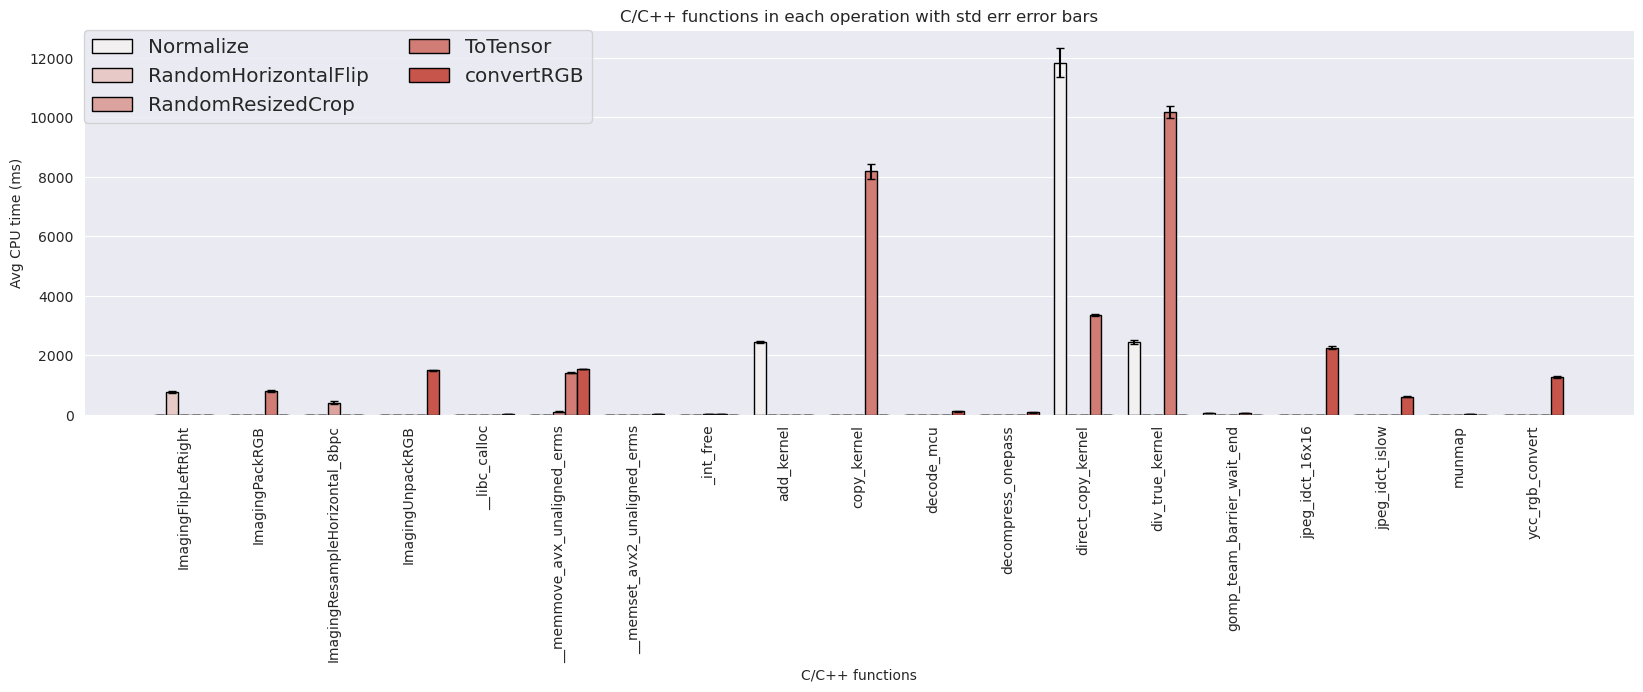

In [15]:

df['std_err'] = df['std_dev'] / np.sqrt(samples)  # where n=20

plt.figure(figsize=(20,5))
bar = sns.barplot(x="func",y="avg", hue="op", data=df, ci=None,color="#DB4437", edgecolor="black")
# plt.errorbar(x="func", y=df["avg"], yerr=df["std_dev"], fmt='none', color='black', capsize=4)

plt.xlabel("C/C++ functions")
plt.ylabel("Avg CPU time (ms)")
plt.title("C/C++ functions in each operation with std err error bars")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)

# Define some hatches
# hatches = ['O','-', 'x', '\\', '//',]
hatches = ['//', '\\\\', '--', 'xx', 'oo', 'OO', '..', '**']
# Assign hatches to each hue category
# for i, patch in enumerate(bar.containers):
#     for bar in patch:
#         bar = bar.set_hatch(hatches[i % len(hatches)])
# get axes subplot object from plt
# bar = plt.gca()
for p in bar.patches:
    width = p.get_width() 
    break
x_coords = [p.get_x() + 0.5 * p.get_width() for p in bar.patches]
y_coords = [p.get_height() for p in bar.patches]
plt.errorbar(x=x_coords, y=y_coords, yerr=df["std_err"], fmt="none", c="k",capsize=3)

legend = plt.legend(loc='upper left', ncol=len(hatches)//4,  borderaxespad=0., fontsize='x-large', title_fontsize='40')

sns.set_style("darkgrid")



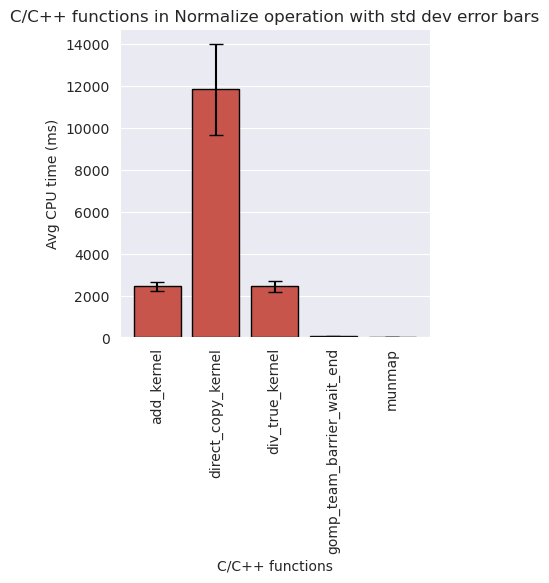

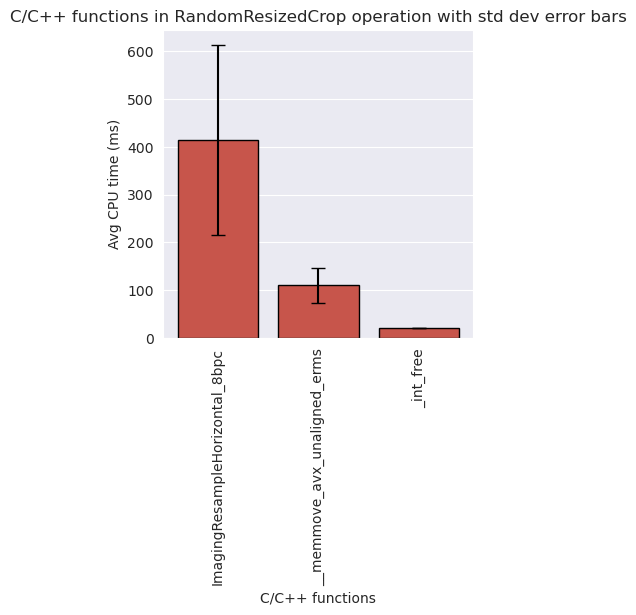

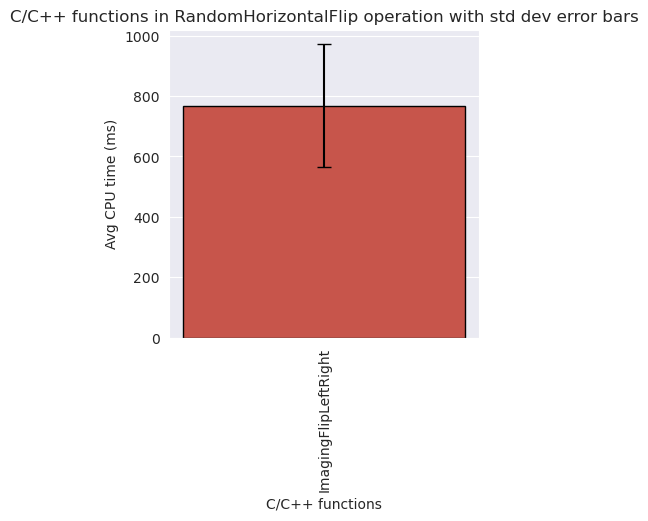

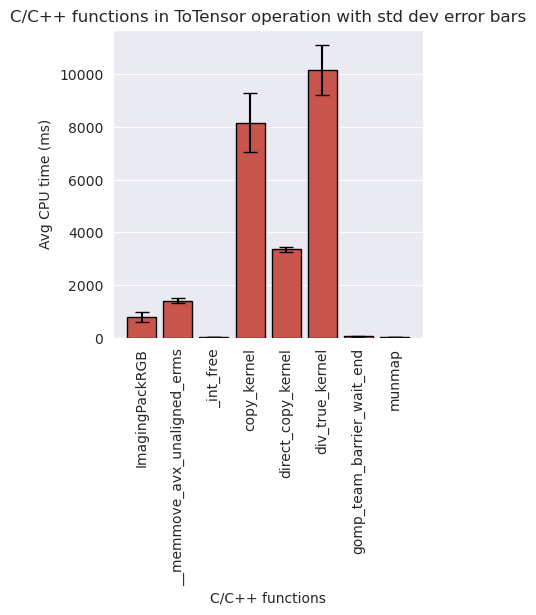

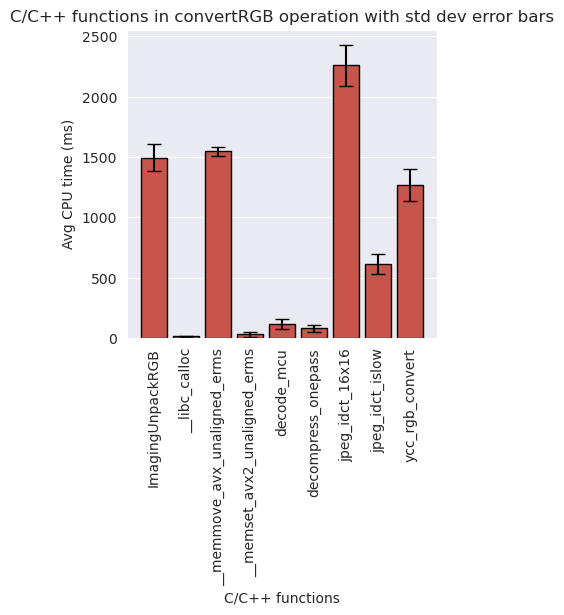

In [16]:

for op in all_ops:
    df_ = df[df["op"] == op]
    # and avg is not zero
    df_ = df_[df_["avg"] != 0]
    plt.figure(figsize=(4,4))
    bar = sns.barplot(x="func",y="avg", data=df_, ci=None,color="#DB4437", edgecolor="black")

    plt.xlabel("C/C++ functions")
    plt.ylabel("Avg CPU time (ms)")
    plt.title(f"C/C++ functions in {op} operation with std dev error bars")
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation=90)

    x_coords = [p.get_x() + 0.5 * p.get_width() for p in bar.patches]
    y_coords = [p.get_height() for p in bar.patches]
    plt.errorbar(x=x_coords, y=y_coords, yerr=df_["std_dev"], fmt="none", c="k",capsize=5,)

    sns.set_style("darkgrid")
    plt.show()



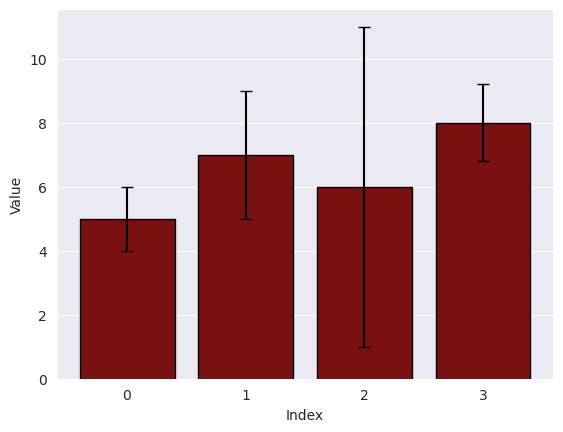

In [17]:
# Create a sample dataframe
data = {'avg': [5, 7, 6, 8],
        'std_dev': [1, 2, 5, 1.2],
        '1std_dev': [1, 2, 5, 1.2]}
df = pd.DataFrame(data)

# Create the bar plot for 'avg' column
bar = sns.barplot(x=df.index, y='avg', data=df, color='darkred', edgecolor='black')

# Add error bars for 'std_dev' column
plt.errorbar(x=df.index, y=df['avg'], yerr=df['std_dev'], fmt='none', color='black', capsize=4)

plt.xlabel('Index')
plt.ylabel('Value')
plt.xticks(ticks=df.index, labels=df.index)
sns.set_style('darkgrid')

# Show the plot
plt.show()

In [18]:
# plot a dataframe's std dev for each op
for op in df["op"].unique():
    plt.figure(figsize=(5,5))
    sns.barplot(x="func", y="coefficient of variation", data=df[df["op"] == op],color="#4285F4",ci=None)
    # add more subplots
    # sns.barplot(x="func", y="std_dev", data=df[df["op"] == op],color="red",ci=None)
    plt.xticks(rotation=90)
    plt.title(f"coefficient of variation for {op}")
    # change x axis title
    plt.xlabel("C/C++ functions")
plt.show()

KeyError: 'op'